## Aprendizaje Supervisado

### Clasificación usando Support Vector Machines

Support Vector Machines (SVM) al igual que la regresión logística, es un algoritmo de clasificación.

La idea principal detras de un SVM es llegar a trazar una linea que separe dos clases de datos, tal como se ve en la imagen:

![](svmintro.png)

Ahora que tenemos un clasificador con el cual podemos predecir (en este caso) si un animal es gato o perro en base a por ejemplo la medida de su ocico y la geometría de la oreja.

Veremos ahora como SVM trabaja y también varias técnicas que podemos adaptar a un SVM para los casos donde los datasets sean no separables linealmente.

### Máxima Separabilidad

Veamos como SVM separa dos o más clases gracias a este ejemplo:

![](pointstosepare.png)

Aquí podemos ver como visualmente podemos trazar dos lineas para separar el conjunto de datos de arriba. Por esa razón (que exiten varias posibles separaciones de clases) es que se define primero el criterio de separación: Para la SVM la linea correcta es la que tiene los márgenes más amplios (con cada margen tocando al menos un punto en cada clase).

Aquí podemos ver como se trazan d1 y d2 que son el ancho de los márgenes, como d2 > d1 podemos decir que la linea correcta es la de la derecha.

**Nota:** Cada márgen toca por lo menos un punto de cada clase.


![](svmpossiblelines.png)

El centro de los dos márgenes es conocido como *hiperplano*. El hiperplano es la linea que separa los dos grupos de puntos y usamos el termon **hiperplano** en vez de linea porque en el SVM tipicamente tratamos con más de 2 dimensiones y el uso de la palabra "hiperplano" transmite con mayor precisión la idea de un plano en un espacio multidimensional.


### Support Vectors (Vectores de soporte)

Un término clave en los SVM son los vectores de soporte o en inglés los Support Vectors que son los puntos en los cuales se ha trazado el margen, en el ejemplo anterior los podemos ver claramente:

![](supportvectors.png)

### Fórmula para el hiperplano

Una vez planteada las definiciones queda por encontrar la formula no solo del hiperplano sino también de los dos márgenes.

![](formulahyperplane.png)

Entonces según la figura tenemos la formula para el hiperplano :

$$ g(x) = \vec{W}_0x_1 + \vec{W}_1x_2 + b $$

Donde:
* $x_1$ y $x_2$ son las entradas.
* $\vec{W}_0$ y $\vec{W}_1$ son los vectores de pesos.
* b bias.

Si $g >= 1$ el punto dado es clasificado como Clase 1, $g <= -1$ el punto es clasificado como Clase 2. Además se tiene que tener en cuenta el objetivo es encontrar el margen más grande, aplicando un poco de geometría analítica (la distancia entre dos rectas paralelas) esta distancia entre las rectas (2d) es:

$$\frac{1 - (-1)}{||W||} = \frac{2}{||W||}$$

Donde $||w||$ es la norma del vector w. Usando el vector de entrenamiento, la meta es minimizar este $||w||$ para obtener la **máxima separabilidad** entre las clases, una vez hecho esto seremos capaces de encontrar $\vec{W}_0$, $\vec{W}_1$ y $b$.

Encontrar el margen es un problema de optimización restringida, que se puede resolver utilizando la técnica de Multiplicadores de Larange. Haremos uso de la biblioteca Scikit-learn.

### Usando scikit-learn para SVM

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

,x1,x2,r
0,0,0,A
1,1,1,A
2,2,3,B
3,2,0,A
4,3,4,B


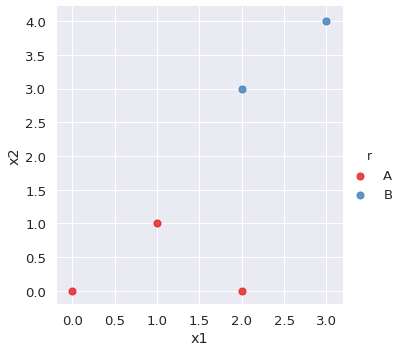

In [2]:
data = pd.read_csv('svm.csv')
sns.lmplot('x1','x2',
           data = data,
           hue = 'r',
           palette ='Set1',
           fit_reg = False,
           scatter_kws={"s":50})
data.head()

In [3]:
from sklearn import svm

In [4]:
points = data[['x1','x2']].values
result = data['r']

clf = svm.SVC(kernel='linear') # significa Support Vector Clasification
clf.fit(points, result)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
print('Vector de pesos (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices de support vectors= ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Número of support vectors para cada clase = ', clf.n_support_)
print('Coeficientes de support vector en la función de decision = ',np.abs(clf.dual_coef_))

Vector de pesos (w) =  [0.4 0.8]
b =  -2.2
Indices de support vectors=  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Número of support vectors para cada clase =  [1 1]
Coeficientes de support vector en la función de decision =  [[0.4 0.4]]


El módulo *svm* contiene una serie de clases que implementen SVM para diferentes propósitos:

* svm.LinearSVC : Linear Support Vector Classification
* svm.LinearSVR : Linear Support Vector Regression
* svm.NuSVC : Nu-Support Vector Classification
* svm.NuSVR : Nu-Support Vector Regression
* svm.OneClassSVM : Unsupervised Outlier Detection
* svm.SVC : C-Support Vector Classification
* svm.SVR : Epsilon-Support Vector Regression

Se tiene los siguientes resultados:

$w_0 = 0.4$

$w_1 = 0.8$

$b = -2.2$

Existen dos support vectors con indices [1, 2] que son [1,1] y [2,3] tal como indica el vector clf.support_vectors.

![](coefhyper.png)

### Gráficando el hiperplano y los márgenes

Recordando la fórmula del hiperplano:

$$g(x)= \vec{w}_0x_1 + \vec{w}_1x_2 + b$$

Para dibujar el hiperplano lo igualamos a 0:

$$ \vec{w}_0x_1 + \vec{w}_1x_2 + b = 0$$

En este caso el hiperplano es una linea (dimensión 1 menos que el numero de variables):

Igualamos a 0 cada variable $x_1$ y $x_2$:

$$ \vec{w}_0(0) + \vec{w}_1x_2 + b = 0$$
$$ x_2 = -\frac{b}{\vec{w}_1} $$

$$ \vec{w}_0x_1 + \vec{w}_1(0) + b = 0$$
$$ x_1 = -\frac{b}{\vec{w}_0} $$

![](plothyper.png)

Calculamos la pendiente:

$$ slope = -\frac{-\frac{b}{\vec{w}_1}}{-\frac{b}{\vec{w}_0}} $$

$$ slope = -\frac{\vec{w}_0}{\vec{w}_1} $$

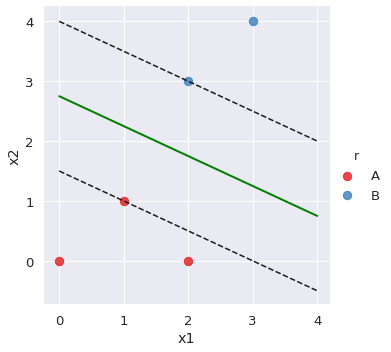

In [6]:
w = clf.coef_[0]

slope = -w[0]/w[1]
b = clf.intercept_[0]

# Dibujando hiperplano
xx = np.linspace(0,4)
yy = slope*xx + (-b/w[1])

# Dibujando márgenes

# Un margen
s = clf.support_vectors_[0]
yy_down = slope*xx + (s[1] - slope*s[0]) # (debe ser un punto en este caso y = m*x + b se despejo el punto b)

# Otro margen
s = clf.support_vectors_[-1] # el último
yy_up = slope*xx + (s[1] - slope*s[0]) # (debe ser un punto en este caso y = m*x + b se despejo el punto b)

# Dibujando
sns.lmplot('x1','x2', data=data, hue='r', palette='Set1',
           fit_reg = False, scatter_kws={"s": 70})

# hiperplano
plt.plot(xx,yy, linewidth=2 , color ='green')

#márgenes
plt.plot(xx,yy_down, 'k--')
plt.plot(xx,yy_up, 'k--')


### Haciendo predicciones

Vamos a dar algunos puntos y ver gracias a nuestro modelo si esta en la clase "A" o "B".

In [8]:
print(clf.predict([[3,3]])[0]) # [3,3]
print(clf.predict([[4,0]])[0]) # [4,0]
print(clf.predict([[2,2]])[0]) # [2,2]
print(clf.predict([[1,2]])[0]) # [1,2]

clf.predict([[1,0],[2,3]]) # Puntos: (1,0) y (2,3)

B
A
B
A


array(['A', 'B'], dtype=object)

In [26]:
print(clf.decision_function([[1,0]])) # g(x) = w_0x_1 + w_1x_2 + b

clf.coef_[0][0]*1 + clf.coef_[0][1]*0 + clf.intercept_[0]

[-1.8]


-1.8000000000000003